In [5]:
%matplotlib inline

**IBM QISKIT CODE**

In [6]:
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 120.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=e25a21eff227187f178309b0cfb384b37a81198a116b4a37a999acacd1b244df
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [7]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_vector, circuit_drawer
from qiskit.quantum_info import Statevector, partial_trace
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

When Hadamard gates are applied to all qubits:

*   Each qubit enters superposition
*   The total states is a superposition of all 2 raise to power 3 which is equal to 8 possible states.

The histogram will show approximately equal probability for all outcomes 000,001,010,011,100,101,110,111.

**Why measurement needed?**

*   Quantum states cannot be directly observed.
*   They collapse upon measurement.
*   If you don't measure, the qubits remain in a superpositon.
*   If you do measure (many times), you get a distribution across the 8 states.
*   If you want to analyze the quantum state before collapse (e.g. plotting on a Bloch sphere), you need the circuit without measurement. So copy of the quantum circuit before adding measurement to it is needed.
*   You can't see a real-world output without measurement.
*   Superposition is invisible until measured.
*   Measurement is essential to observe how a qubit behaves under superposition.
*   If you only want to analyze the state, don't measure.
*   If you want to observe and verify behaviour the measurement is mandatory.


**What is state in Quantum?**

A state is a vector in the complex vector space describing the qubits. It represents the complete information about the quantum system.

Quantum Circuit with Hadamard Gates:


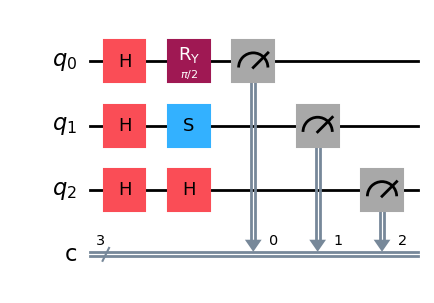

Measurement Result (Probability Distribution): {'001': 504, '011': 496}


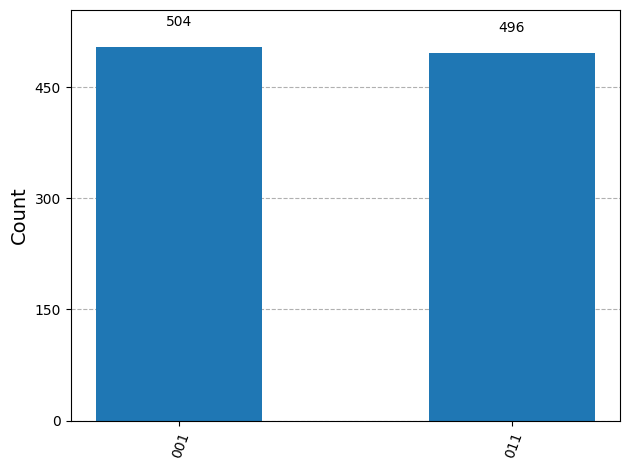


Bloch vector for Qubit 0:


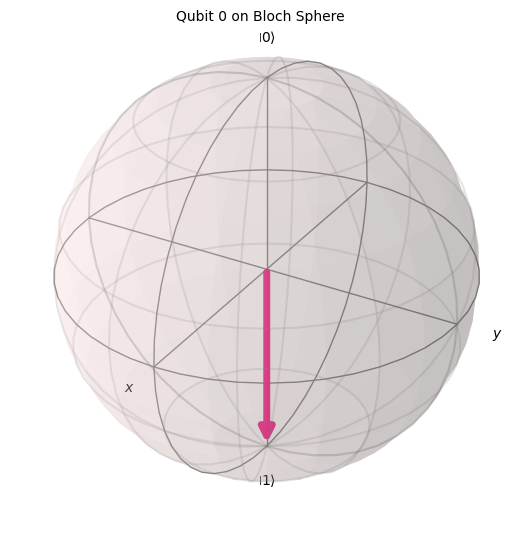


Bloch vector for Qubit 1:


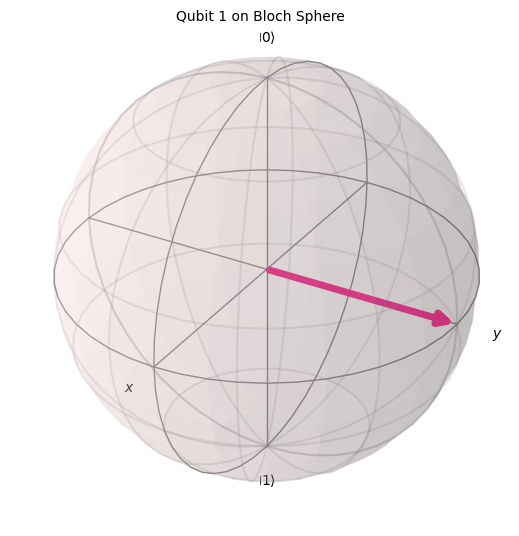


Bloch vector for Qubit 2:


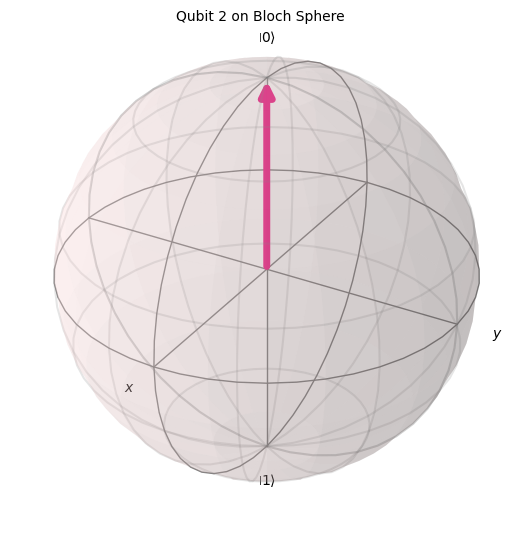

In [18]:

# Create quantum circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Apply Hadamard to all qubits (superposition)
qc.h(0)
#qc.ry(np.pi / 2, 0) # we can change the gates to observe direction of phase of Qubit state
qc.h(1)
#qc.s(1)
qc.h(2)
#qc.h(2)

qc_before_measure = qc.copy()

qc.measure([0, 1, 2], [0, 1, 2])

print("Quantum Circuit with Hadamard Gates:")
display(qc.draw(output='mpl'))

simulator = AerSimulator()
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()

print("Measurement Result (Probability Distribution):", counts)
hist_fig = plot_histogram(counts)
display(hist_fig)

state = Statevector.from_instruction(qc_before_measure)

for i in range(3):
    reduced_state = partial_trace(state, [j for j in range(3) if j != i])
    bloch = reduced_state.data
    x = 2 * np.real(bloch[0][1])
    y = 2 * np.imag(bloch[1][0])
    z = np.real(bloch[0][0] - bloch[1][1])
    print(f"\nBloch vector for Qubit {i}:")
    display(plot_bloch_vector([x, y, z], title=f"Qubit {i} on Bloch Sphere"))


**PENNYLANE CODE**

In [9]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 65.4 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


Qubit 0 Bloch Vector: [np.float64(0.9999999999999993), np.float64(0.0), np.float64(0.0)]


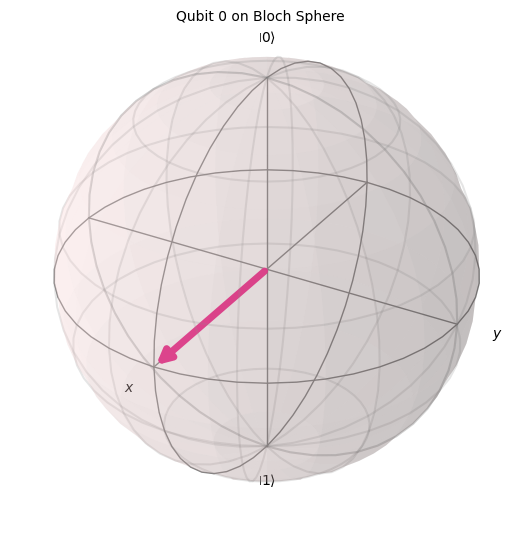

Qubit 1 Bloch Vector: [np.float64(0.9999999999999993), np.float64(0.0), np.float64(0.0)]


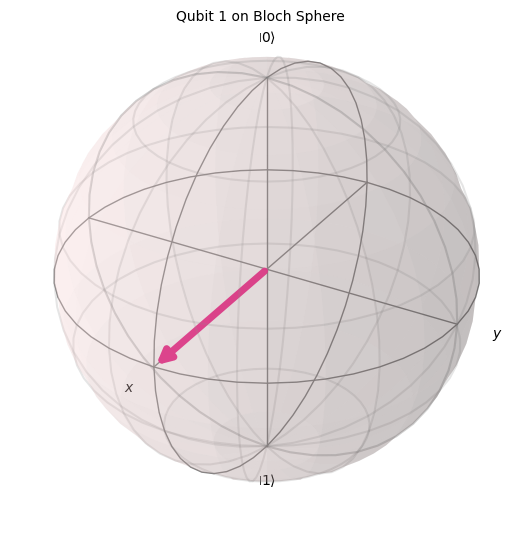

Qubit 2 Bloch Vector: [np.float64(0.0), np.float64(0.0), np.float64(0.9999999999999993)]


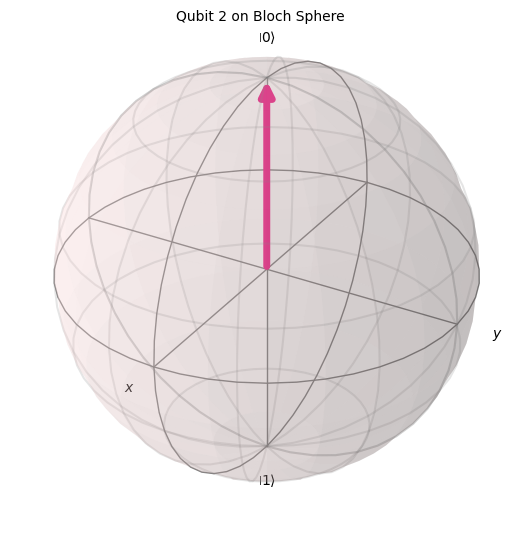

In [10]:
import pennylane as qml
from pennylane import numpy as np
from qiskit.visualization import plot_bloch_vector
from IPython.display import display
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=3, shots=None)

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=2)
    return qml.state()

state = circuit()

def get_bloch_vector(state, target_wire):
    reduced_rho = qml.math.reduce_statevector(state, indices=[target_wire])
    x = 2 * np.real(reduced_rho[0, 1])
    y = 2 * np.imag(reduced_rho[1, 0])
    z = np.real(reduced_rho[0, 0] - reduced_rho[1, 1])
    return [x, y, z]

for i in range(3):
    bloch_vector = get_bloch_vector(state, i)
    print(f"Qubit {i} Bloch Vector: {bloch_vector}")
    bloch_fig = plot_bloch_vector(bloch_vector, title=f"Qubit {i} on Bloch Sphere")
    display(bloch_fig)


/usr/local/lib/python3.12/dist-packages/pennylane/devices/device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


Quantum Circuit Diagram:
0: ──H─┤ ╭Probs
1: ──H─┤ ├Probs
2: ──H─┤ ╰Probs


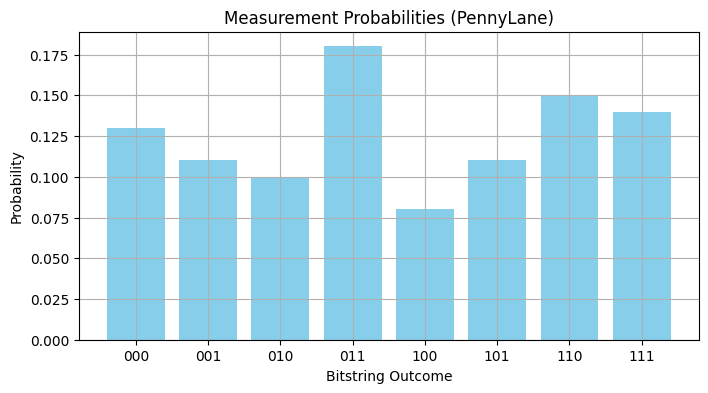

In [11]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=3, shots=100)

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    #qml.Hadamard(wires=2)
    return qml.probs(wires=[0, 1, 2])

drawer = qml.draw(circuit)
print("Quantum Circuit Diagram:")
print(drawer())

probabilities = circuit()

bitstrings = [format(i, '03b') for i in range(len(probabilities))]

plt.figure(figsize=(8, 4))
plt.bar(bitstrings, probabilities, color='skyblue')
plt.xlabel("Bitstring Outcome")
plt.ylabel("Probability")
plt.title("Measurement Probabilities (PennyLane)")
plt.grid(True)
plt.show()


Quantum Circuit Diagram:
0: ──H─┤ ╭Probs
1: ──H─┤ ├Probs
2: ──H─┤ ╰Probs
Qubit 0 Bloch Vector: [np.float64(0.9999999999999996), np.float64(0.0), np.float64(0.0)]


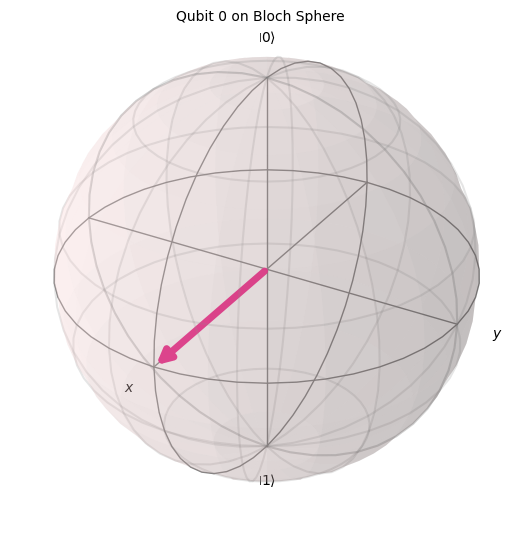

Qubit 1 Bloch Vector: [np.float64(0.9999999999999996), np.float64(0.0), np.float64(0.0)]


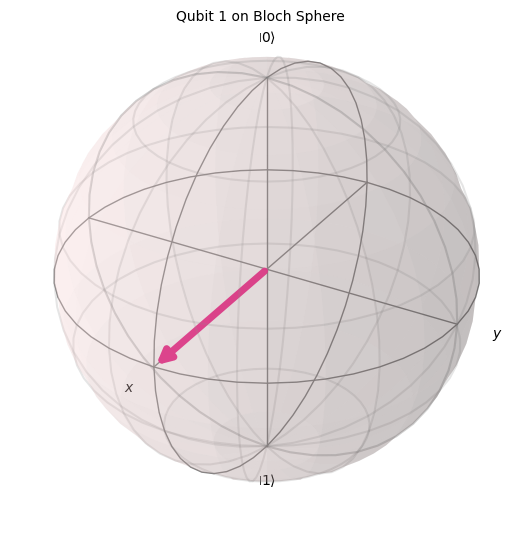

Qubit 2 Bloch Vector: [np.float64(0.9999999999999996), np.float64(0.0), np.float64(0.0)]


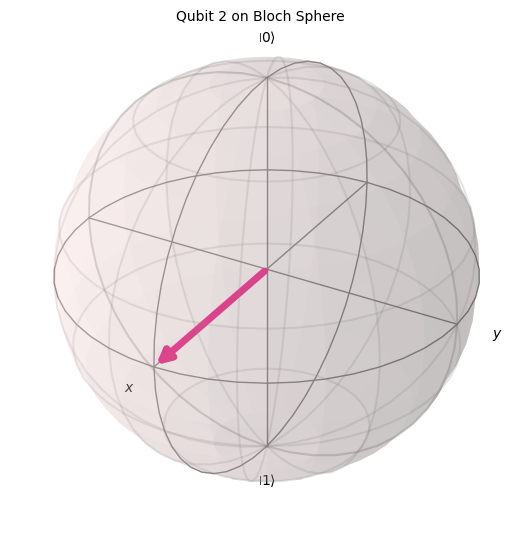

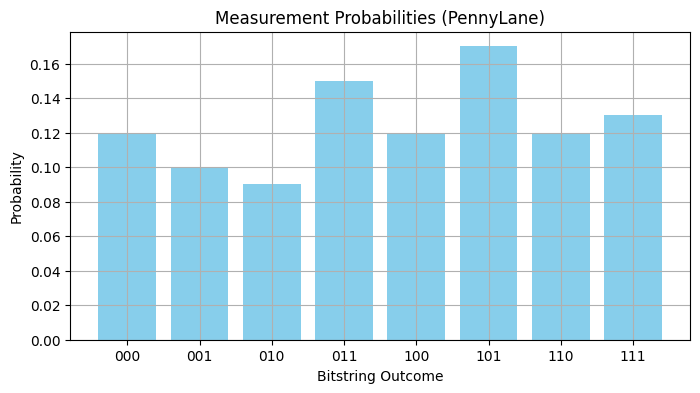

In [12]:
import pennylane as qml
from pennylane import numpy as np
from qiskit.visualization import plot_bloch_vector
from IPython.display import display
import matplotlib.pyplot as plt

dev_sv = qml.device("default.qubit", wires=3, shots=None)
dev_shots = qml.device("default.qubit", wires=3, shots=100)

@qml.qnode(dev_sv)
def bloch_circuit():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    return qml.state()

@qml.qnode(dev_shots)
def prob_circuit():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    # qml.Hadamard(wires=2)  # optional duplicate Hadamard
    return qml.probs(wires=[0, 1, 2])


print("Quantum Circuit Diagram:")
drawer = qml.draw(prob_circuit)
print(drawer())

state = bloch_circuit()

def get_bloch_vector(state, target_wire):
    reduced_rho = qml.math.reduce_statevector(state, indices=[target_wire])
    x = 2 * np.real(reduced_rho[0, 1])
    y = 2 * np.imag(reduced_rho[1, 0])
    z = np.real(reduced_rho[0, 0] - reduced_rho[1, 1])
    return [x, y, z]

for i in range(3):
    bloch_vector = get_bloch_vector(state, i)
    print(f"Qubit {i} Bloch Vector: {bloch_vector}")
    fig = plot_bloch_vector(bloch_vector, title=f"Qubit {i} on Bloch Sphere")
    display(fig)

probabilities = prob_circuit()

bitstrings = [format(i, '03b') for i in range(len(probabilities))]
plt.figure(figsize=(8, 4))
plt.bar(bitstrings, probabilities, color='skyblue')
plt.xlabel("Bitstring Outcome")
plt.ylabel("Probability")
plt.title("Measurement Probabilities (PennyLane)")
plt.grid(True)
plt.show()


**GOOGLE CIRQ CODE**

In [13]:
!pip install cirq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 30.0 MB/s eta 0:00:00


Quantum Circuit with Hadamard Gates:
0: ───H───X───M('m')───
              │
1: ───H───────M────────
              │
2: ───H───────M────────
Measurement Result (Probability Distribution): {'100': 131, '011': 120, '001': 110, '010': 128, '111': 118, '101': 150, '000': 119, '110': 124}


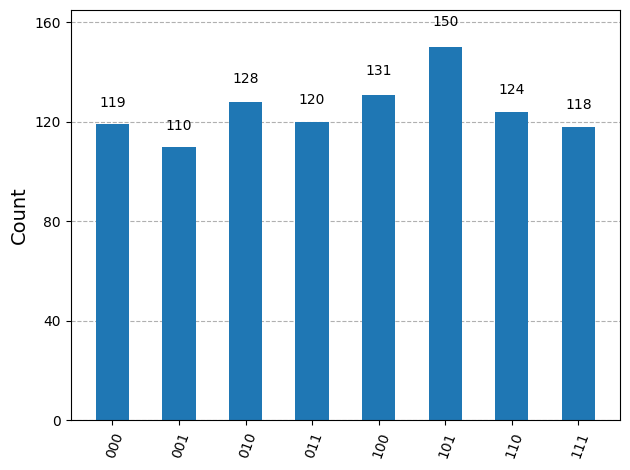

In [17]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram, plot_bloch_vector
from IPython.display import display

qubits = [cirq.LineQubit(i) for i in range(3)]

circuit = cirq.Circuit()

for q in qubits:
    circuit.append(cirq.H(q))

# Apply X gate only on qubit 0
circuit.append(cirq.X(qubits[0]))


circuit_before_measure = circuit.copy()

circuit.append(cirq.measure(*qubits, key='m'))

print("Quantum Circuit with Hadamard Gates:")
print(circuit)

simulator = cirq.Simulator()

result = simulator.run(circuit, repetitions=1000)
counts = result.histogram(key='m')

def int_to_bitstring(num, length=3):
    return format(num, '0{}b'.format(length))[::-1]

counts_bitstrings = {int_to_bitstring(k, 3): v for k, v in counts.items()}

print("Measurement Result (Probability Distribution):", counts_bitstrings)

hist_fig = plot_histogram(counts_bitstrings)
display(hist_fig)


Qubit 0 Bloch Vector: [np.float32(0.99999994), np.float32(0.0), np.float32(0.0)]


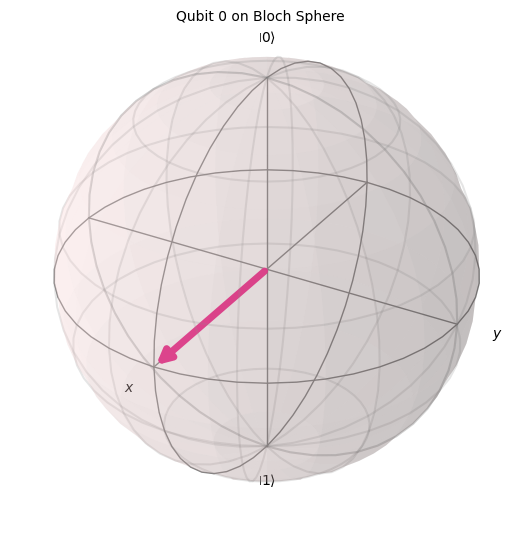

Qubit 1 Bloch Vector: [np.float32(0.99999994), np.float32(0.0), np.float32(0.0)]


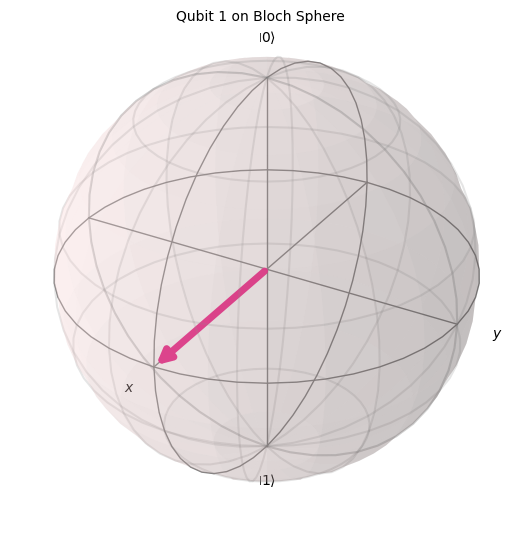

Qubit 2 Bloch Vector: [np.float32(0.99999994), np.float32(0.0), np.float32(0.0)]


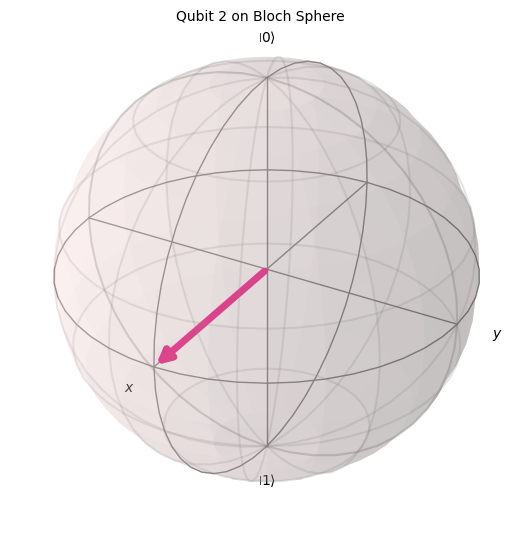

In [15]:
import cirq
import numpy as np
from qiskit.visualization import plot_bloch_vector
from IPython.display import display

qubits = [cirq.LineQubit(i) for i in range(3)]

circuit = cirq.Circuit()
circuit.append(cirq.H(q) for q in qubits)

simulator = cirq.Simulator()
result = simulator.simulate(circuit)
state_vector = result.final_state_vector

def get_reduced_density_matrix(full_state, target, total_qubits):
    full_dm = np.outer(full_state, np.conj(full_state)).reshape([2] * total_qubits * 2)

    for i in reversed(range(total_qubits)):
        if i != target:
            full_dm = np.trace(full_dm, axis1=i, axis2=i + total_qubits - 1)
    return full_dm

for i in range(3):
    rdm = get_reduced_density_matrix(state_vector, i, 3)
    x = 2 * np.real(rdm[0, 1])
    y = 2 * np.imag(rdm[1, 0])
    z = np.real(rdm[0, 0] - rdm[1, 1])
    bloch_vec = [x, y, z]
    print(f"Qubit {i} Bloch Vector: {bloch_vec}")
    fig = plot_bloch_vector(bloch_vec, title=f"Qubit {i} on Bloch Sphere")
    display(fig)


Full Quantum Circuit:
0: ───H───M('m')───
          │
1: ───H───M────────
          │
2: ───H───M────────
Measurement Result (Probability Distribution): {'010': 118, '001': 124, '100': 140, '011': 112, '000': 138, '101': 127, '110': 120, '111': 121}


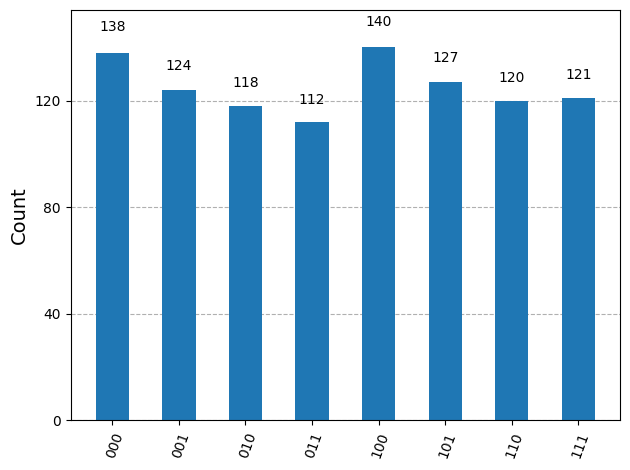

Qubit 0 Bloch Vector: [np.float32(0.99999994), np.float32(0.0), np.float32(0.0)]


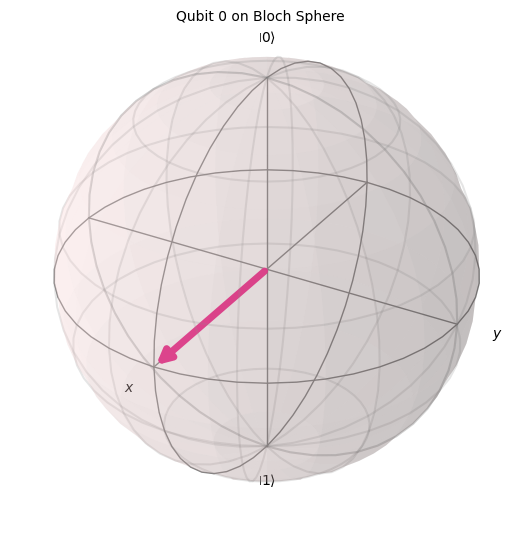

Qubit 1 Bloch Vector: [np.float32(0.99999994), np.float32(0.0), np.float32(0.0)]


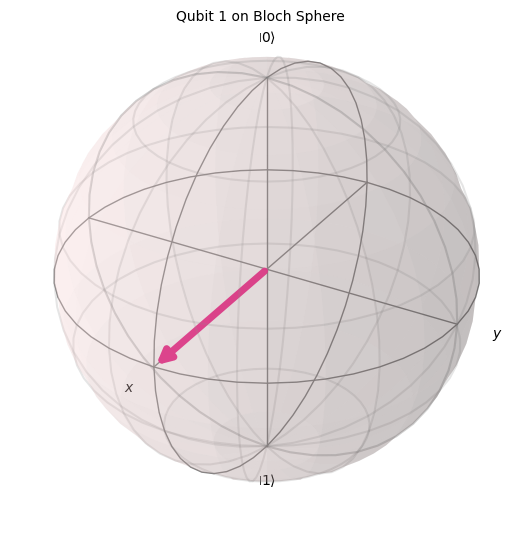

Qubit 2 Bloch Vector: [np.float32(0.99999994), np.float32(0.0), np.float32(0.0)]


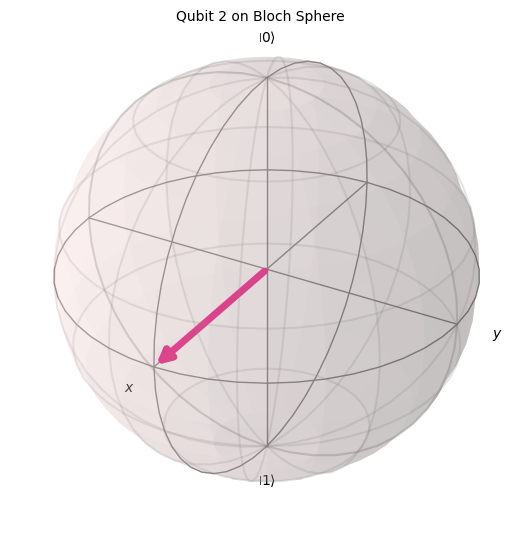

In [16]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram, plot_bloch_vector
from IPython.display import display

qubits = [cirq.LineQubit(i) for i in range(3)]

circuit = cirq.Circuit()

# Apply X gate only on qubit 0
#circuit.append(cirq.X(qubits[0]))

circuit.append(cirq.H(q) for q in qubits)
circuit_before_measure = circuit.copy()

circuit.append(cirq.measure(*qubits, key='m'))

print("Full Quantum Circuit:")
print(circuit)
simulator = cirq.Simulator()
result_sv = simulator.simulate(circuit_before_measure)
state_vector = result_sv.final_state_vector

result = simulator.run(circuit, repetitions=1000)
counts = result.histogram(key='m')

def int_to_bitstring(num, length=3):
    return format(num, '0{}b'.format(length))[::-1]

counts_bitstrings = {int_to_bitstring(k, 3): v for k, v in counts.items()}
print("Measurement Result (Probability Distribution):", counts_bitstrings)

hist_fig = plot_histogram(counts_bitstrings)
display(hist_fig)

def get_reduced_density_matrix(full_state, target, total_qubits):
    full_dm = np.outer(full_state, np.conj(full_state)).reshape([2] * total_qubits * 2)
    for i in reversed(range(total_qubits)):
        if i != target:
            full_dm = np.trace(full_dm, axis1=i, axis2=i + total_qubits - 1)
    return full_dm

for i in range(3):
    rdm = get_reduced_density_matrix(state_vector, i, 3)
    x = 2 * np.real(rdm[0, 1])
    y = 2 * np.imag(rdm[1, 0])
    z = np.real(rdm[0, 0] - rdm[1, 1])
    bloch_vec = [x, y, z]
    print(f"Qubit {i} Bloch Vector: {bloch_vec}")
    fig = plot_bloch_vector(bloch_vec, title=f"Qubit {i} on Bloch Sphere")
    display(fig)
